# Création d'un filtre pour Image

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

On commence par charger l'image avec la librairie matplotlib

In [3]:
from matplotlib.image import imread
image = imread("anemone.png")
image.shape

(960, 1280, 3)

L'image a été chargé sous la forme d'un tableau de 533 ligne et 800 colonnes. Chacune des élément du tableau correspond à un pixel. On a donc 533x800 pixels.
Chaque pixel de l'image est représenté sous la forme d'un vecteur à trois composante correspondant aux nombre de canaux de couleur rouge, vert, bleu (RVB).

Avec la méthode reshape on redimentionne notre tableau pour obtenir une seul liste contenant nos vecteurs couleurs.

In [4]:
X = image.reshape(-1, 3)
X.shape

(1228800, 3)

On peut maintenant partitionner les couleurs avec les kmeans.
- Les variables données en entré seront les couleurs rouge, vert et bleu.
- Pour chaque observation on récupère les coordonnées du cluster auquel il appartient.

In [5]:
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img.shape

(1228800, 3)

- Concerver que 8 clusters revient à ne concerver que 8 nuances de couleurs possibles.
- On termine en redimentionant notre tableau aux dimentions de départ.

In [6]:
segmented_img = segmented_img.reshape(image.shape)
segmented_img.shape

(960, 1280, 3)

Je réitère l'expèrience pour différent nombres de clusters (différent nombre de nuances possible).

In [7]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

In [8]:
kmeans.cluster_centers_[kmeans.labels_]

array([[31.49792404, 60.544141  , 40.5873067 ],
       [31.49792404, 60.544141  , 40.5873067 ],
       [31.49792404, 60.544141  , 40.5873067 ],
       ...,
       [31.49792404, 60.544141  , 40.5873067 ],
       [31.49792404, 60.544141  , 40.5873067 ],
       [31.49792404, 60.544141  , 40.5873067 ]])

Il ne me reste plus qu'a ploter les images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


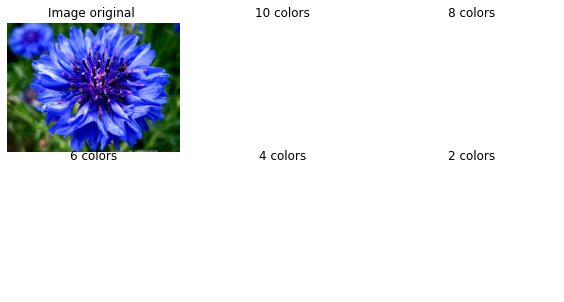

In [9]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Image original ")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()